In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt


data = pd.read_csv('/content/drive/MyDrive/rosresampled_dataset.csv')
data.head(5)

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,target
0,FD6114,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,L
1,FD7839,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,M
2,FD5075,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,M
3,FD8233,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,M
4,NC1180,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,L


In [25]:
data.isnull().sum()

Product_Id                    0
Product_Weight                0
Product_Sugar_Content         0
Product_Allocated_Area      349
Product_Type                  0
Product_MRP                   0
Store_Id                      0
Store_Establishment_Year      0
Store_Size                    0
Store_Location_City_Type      0
Store_Type                    0
target                        0
dtype: int64

In [26]:
data['Product_Allocated_Area']=data['Product_Allocated_Area'].ffill()

In [27]:
data.isnull().sum()

Product_Id                  0
Product_Weight              0
Product_Sugar_Content       0
Product_Allocated_Area      0
Product_Type                0
Product_MRP                 0
Store_Id                    0
Store_Establishment_Year    0
Store_Size                  0
Store_Location_City_Type    0
Store_Type                  0
target                      0
dtype: int64

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Product_Id'] = le.fit_transform(data['Product_Id'])
data['Product_Sugar_Content'] = le.fit_transform(data['Product_Sugar_Content'])
data['Product_Type'] = le.fit_transform(data['Product_Type'])
data['Store_Id'] = le.fit_transform(data['Store_Id'])
data['Store_Size'] = le.fit_transform(data['Store_Size'])
data['Store_Location_City_Type'] = le.fit_transform(data['Store_Location_City_Type'])
data['Store_Type'] = le.fit_transform(data['Store_Type'])
data['target'] = le.fit_transform(data['target'])

In [29]:
pip install xgboost


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [31]:
X = data.iloc[:,0:11]
y = data['target']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35)


In [33]:
model = XGBClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Additional: Display a classification report
class_report = classification_report(y_test, predictions)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.9868967721316715
Confusion Matrix:
[[1059    0    0]
 [   0 1000   14]
 [  12   15 1029]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1059
           1       0.99      0.99      0.99      1014
           2       0.99      0.97      0.98      1056

    accuracy                           0.99      3129
   macro avg       0.99      0.99      0.99      3129
weighted avg       0.99      0.99      0.99      3129



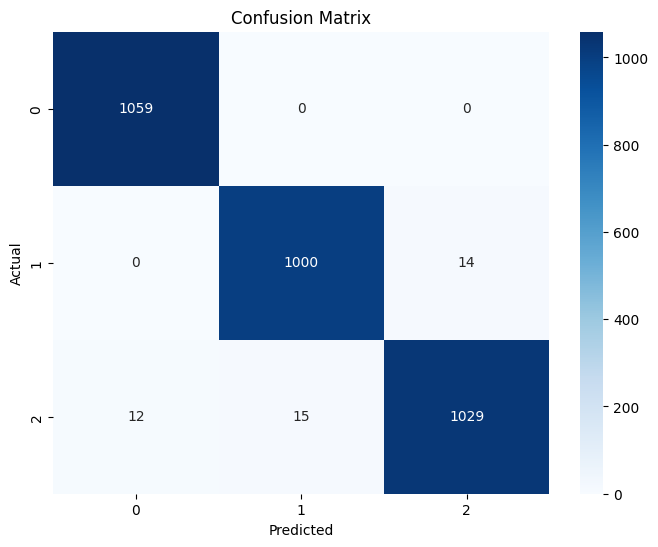

In [34]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()